In [23]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import math







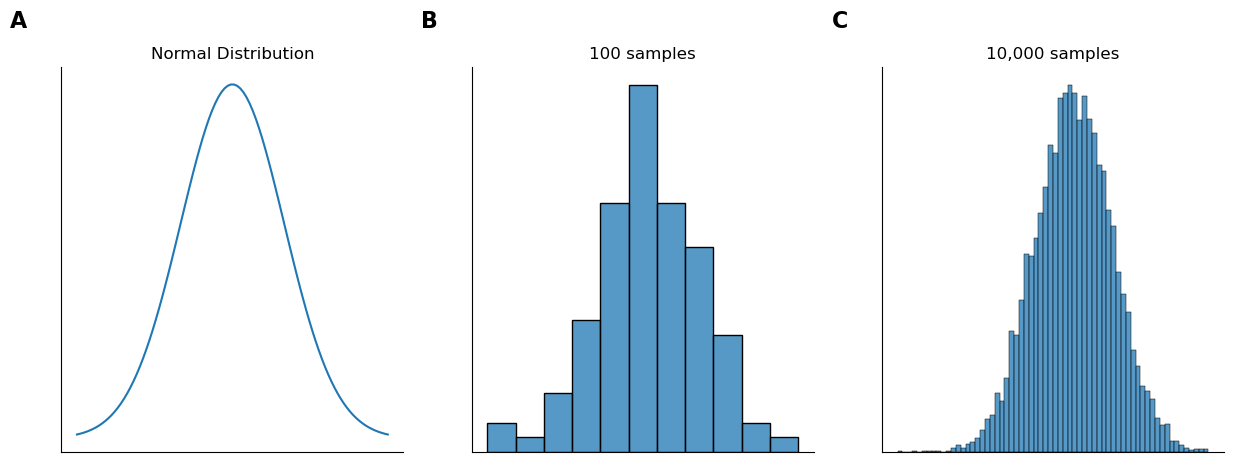

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# plot normal distribution
mu = 100
sigma = 15
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)
ax0 = sns.lineplot(x=x,y=y, ax=axes[0])

# plot histogram of 100 samples from normal distribution
IQ = np.random.normal(loc=100,scale=15,size=100)
ax1 = sns.histplot(IQ, ax=axes[1])

# plot histogram of 10000 samples from normal distribution
IQ = np.random.normal(loc=100,scale=15,size=10000)
ax2 = sns.histplot(IQ,ax=axes[2])

# add titles, labels, and formatting
labels = ['A', 'B', 'C']
titles = ['Normal Distribution', '100 samples', '10,000 samples']
for i,ax in enumerate(axes):
    ax.set_title(titles[i])
    ax.text(-0.1, 1.15, labels[i], transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
    ax.set(xticklabels=[])
    ax.set(yticklabels=[])
    ax.set(ylabel=None)
    ax.tick_params(axis='both', 
                   which='both',
                   bottom=False,
                   left=False)

# remove top and bottom spines
sns.despine()

Now suppose I run an experiment. I select 100 people at random and administer an IQ test, giving me a simple random sample from the population. My sample would consist of a collection of numbers like this:

                          106 101 98 80 74 ... 107 72 100

# working with large numbers

In [25]:
import numpy as np
import statistics

IQ_10 = np.random.normal(loc=100,scale=15,size=10)
IQ_100 = np.random.normal(loc=100,scale=15,size=100)
IQ_10000 = np.random.normal(loc=100,scale=15,size=10000)

print("10 samples. Mean: ", statistics.mean(IQ_10), " Standard deviation: ", statistics.stdev(IQ_10))
print("100 samples. Mean: ", statistics.mean(IQ_100), " Standard deviation: ", statistics.stdev(IQ_100))
print("10000 samples. Mean: ", statistics.mean(IQ_10000), " Standard deviation: ", statistics.stdev(IQ_10000))

10 samples. Mean:  100.10297777206378  Standard deviation:  14.224620974689847
100 samples. Mean:  99.33004131097015  Standard deviation:  14.437374813720472
10000 samples. Mean:  99.99062648308629  Standard deviation:  14.856482474667596


#  Sampling distribution of the mean

In [26]:
IQ_1 = np.random.normal(loc=100, scale=15, size=5).astype(int)
print("simultated data: ", IQ_1)
print("Mean of simulated data: ", statistics.mean(IQ_1))

simultated data:  [ 97  90  99 107 102]
Mean of simulated data:  99


Because I am sampling at random from the normal distribution, the mean of the simulated data will change every time we run the code. In fact, this number will likely change every time I updat this book, since the code will run again, and pick five new values from the normal distribution. Depending on the luck of the draw, the mean may be closer or further from the true mean of 100. Now imagine that I decided to replicate the experiment. That is, I repeat the procedure as closely as possible: I randomly sample 5 new people and measure their IQ.

In [27]:
IQ_2 = np.random.normal(loc=100,scale=15,size=5).astype(int)
print("Simulated data: ", IQ_2)
print("Mean of simulated data: ", statistics.mean(IQ_2))

Simulated data:  [ 94  86  93 110 112]
Mean of simulated data:  99


If I repeat the experiment 10 times, I can a whole series of simulated experiments, each showing the results of five “people” participating in my “experiment”, like so:

In [28]:
import pandas as pd
df = pd.DataFrame(
    {'Person 1': np.random.normal(loc=100,scale=15,size=10).astype(int),
     'Person 2': np.random.normal(loc=100,scale=15,size=10).astype(int),
     'Person 3': np.random.normal(loc=100,scale=15,size=10).astype(int),
     'Person 4': np.random.normal(loc=100,scale=15,size=10).astype(int),
     'Person 5': np.random.normal(loc=100,scale=15,size=10).astype(int),
    }) 

df['Sample Mean']=df.mean(axis=1)
df.index=['Replication '+str(i+1) for i in range(df.shape[0])]
df

,Person 1,Person 2,Person 3,Person 4,Person 5,Sample Mean
Replication 1,83,97,116,95,120,102.2
Replication 2,84,80,90,115,98,93.4
Replication 3,93,77,87,95,82,86.8
Replication 4,134,78,126,104,95,107.4
Replication 5,108,110,115,85,104,104.4
Replication 6,92,108,89,110,84,96.6
Replication 7,96,105,111,111,94,103.4
Replication 8,81,94,116,100,86,95.4
Replication 9,61,100,82,87,85,83.0
Replication 10,87,90,83,128,134,104.4


Now suppose that I decided to keep going in this fashion, replicating this “five IQ scores” experiment over and over again. Every time I replicate the experiment I write down the sample mean. Over time, I’d be amassing a new data set, in which every experiment generates a single data point. The first 10 observations from my data set are the sample means listed in the table below, so my data set starts out like this:

In [29]:
list(df['Sample Mean'])

[102.2, 93.4, 86.8, 107.4, 104.4, 96.6, 103.4, 95.4, 83.0, 104.4]

What if I continued like this for 10,000 replications, and then drew a histogram?

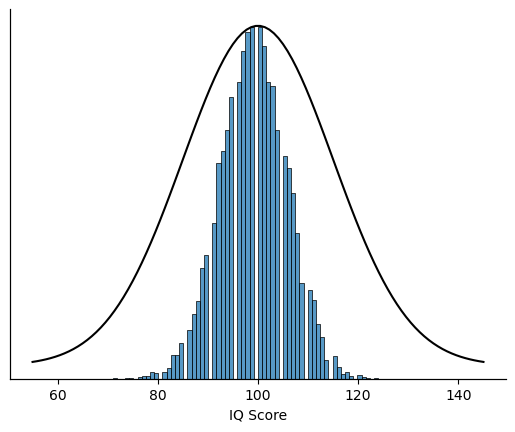

In [30]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np
import statistics
import math

# define a normal distribution with a mean of 100 and a standard deviation of 15
mu = 100
sigma = 15
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

# run 10000 simulated experiments with 5 subjects each, and calculate the sample mean for each experiment
sample_means = []
for i in range(1,10000):
    sample_mean = statistics.mean(np.random.normal(loc=100,scale=15,size=5).astype(int))
    sample_means.append(sample_mean)


# plot a histogram of the distribution of sample means, together with the population distribution
fig, ax = plt.subplots()
sns.histplot(sample_means, ax=ax)
ax2 = ax.twinx()
sns.lineplot(x=x,y=y, ax=ax2, color='black')

# format the figure
axes=[ax, ax2]
for ax in axes:
    ax.set(yticklabels=[])
    ax.set(ylabel=None)
    ax.set(xlabel='IQ Score')
    ax.tick_params(axis='both', 
                    which='both',
                    left=False,
                    right=False)
    ax.spines[['right', 'top']].set_visible(False)
    

Doing this over and over again would give me a very different sampling distribution, namely the sampling distribution of the maximum. The sampling distribution of the maximum of 5 IQ scores is shown in fig-IQ_max. Not surprisingly, if you pick 5 people at random and then find the person with the highest IQ score, they’re going to have an above average IQ. Most of the time you’ll end up with someone whose IQ is measured in the 100 to 140 range.

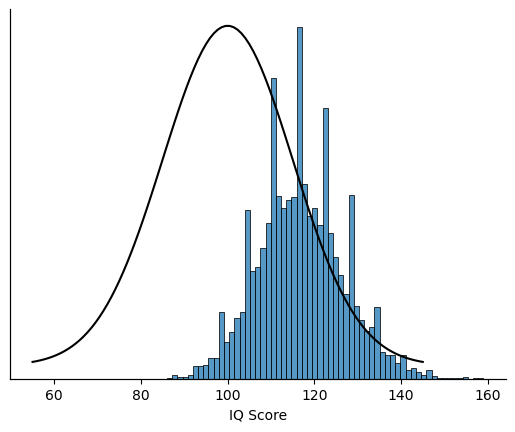

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

# define a normal distribution with a mean of 100 and a standard deviation of 15
mu = 100
sigma = 15
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

# run 10000 simulated experiments with 5 subjects each, and find the maximum score for each experiment
sample_maxes = []
for i in range(1,10000):
    sample_max = max(np.random.normal(loc=100,scale=15,size=5).astype(int))
    sample_maxes.append(sample_max)


# plot a histogram of the distribution of sample maximums, together with the population distribution
fig, ax = plt.subplots()
sns.histplot(sample_maxes, ax=ax)
ax2 = ax.twinx()
sns.lineplot(x=x,y=y, ax=ax2, color='black')

# format the figure
axes=[ax, ax2]
for ax in axes:
    ax.set(yticklabels=[])
    ax.set(ylabel=None)
    ax.set(xlabel='IQ Score')
    ax.tick_params(axis='both', 
                    which='both',
                    left=False,
                    right=False)
    ax.spines[['right', 'top']].set_visible(False)
    

# Estimating the population standard deviation

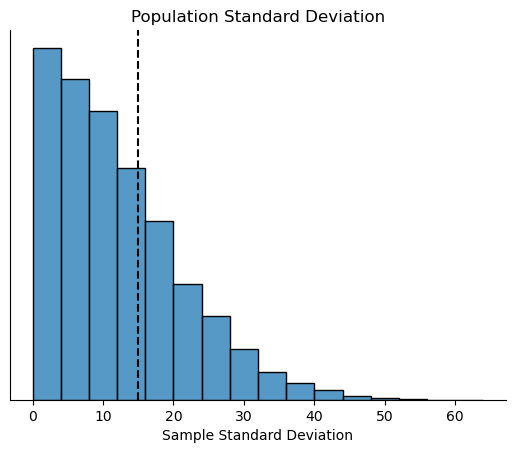

In [32]:
n = 2
sample_sds = []
for i in range(1,10000):
    sample_sd = statistics.stdev(np.random.normal(loc=100,scale=15,size=n))
    sample_sds.append(sample_sd)

ax=sns.histplot(sample_sds, binwidth=4)
plt.axvline(15, color = 'black', linestyle = "dashed")

ax.set(yticklabels=[])
ax.set(ylabel=None)
ax.set(xlabel='Sample Standard Deviation')
ax.set_title("Population Standard Deviation")
ax.tick_params(left=False)    
ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(axis='both', 
                    which='both',
                    left=False,
                    right=False)

# Estimating a confidence interval

In [33]:
from scipy.stats import norm 
list(norm.ppf([.025, 0.975]))

[-1.9599639845400545, 1.959963984540054]

In [34]:
list(norm.ppf([.15, .85]))

[-1.0364333894937898, 1.0364333894937898]

In [35]:
from scipy.stats import t
N = 10000   # suppose our sample size is 10,000
list(t.ppf([.025, 0.975], df = N-1))

[-1.960201263621358, 1.9602012636213575]

In [36]:
N = 10   # suppose our sample size is 10
list(t.ppf([.025, 0.975], df = N-1))

[-2.262157162740992, 2.2621571627409915]

# plotting confidence intervals in Python
There are many different ways you can draw graphs that show confidence intervals as error bars, and the method you select will depend on what you are trying to achieve. However, seaborn offers some good, off-the-shelf methods for plotting confidence intervals, which should cover most of the common cases. More in-depth information about these can be found in the seaborn documentation, but here are a few common cases, using seaborn’s built-in “tips” dataset.

In [37]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


To compare the mean total bill for lunches and dinners for smokers and non-smokers, we can use sns.pointplot. Notice that you can specifiy the size of desired confidence interval. By convention, people tend to use a 95% confidence interval, and this is the default in seaborn, but it is possible to specify a different one. Just make sure you report what size confidence interval you are showing! In the figure to the right, below, I have used a 40% confidence interval, but I probably wouldn’t do that in a paper, because it is likely to confuse or mislead readers who expect a 95% CI.

C:\Users\keith\AppData\Local\Temp\ipykernel_16104\3591514384.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 40)` for the same effect.

  sns.pointplot(x="time", y="total_bill", hue="smoker",  ci = 40, data=tips, ax=axes[1])


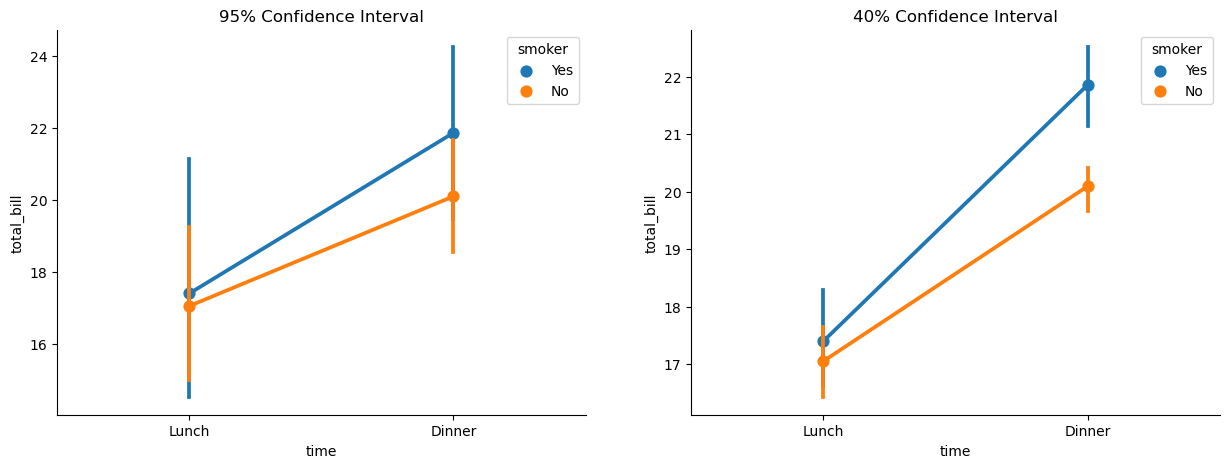

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
tips = sns.load_dataset("tips")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))


sns.pointplot(x="time", y="total_bill", hue="smoker", data=tips, ax=axes[0])
sns.pointplot(x="time", y="total_bill", hue="smoker",  ci = 40, data=tips, ax=axes[1])
axes[0].set_title("95% Confidence Interval")
axes[1].set_title("40% Confidence Interval")
sns.despine()

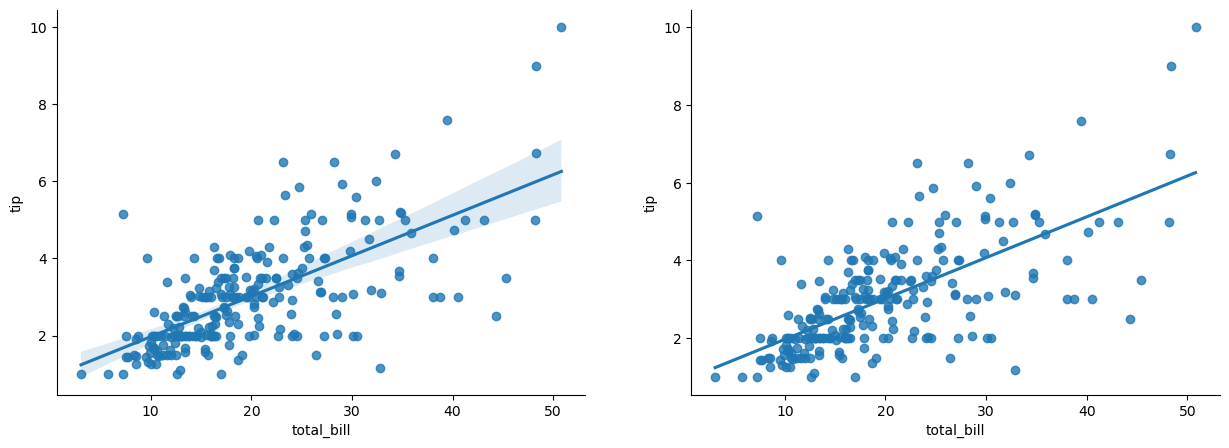

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.regplot(x="total_bill", y="tip", data=tips, ax=axes[0])
sns.regplot(x="total_bill", y="tip", data=tips, ci = None, ax=axes[1])

sns.despine()

For regression plots with discrete variables on the x-axis, seaborn has options for either showing all datapoints, or showing only the mean with error-bars indicating the confidence interval. There are many more details and options to be found in the seaborn documentation. For more complex or custom figures, like the one in fig-cirep showing confidence intervals for simulated IQ data, you will need to dive into matplotlib, which allows much more customization than is available simply using seaborn.

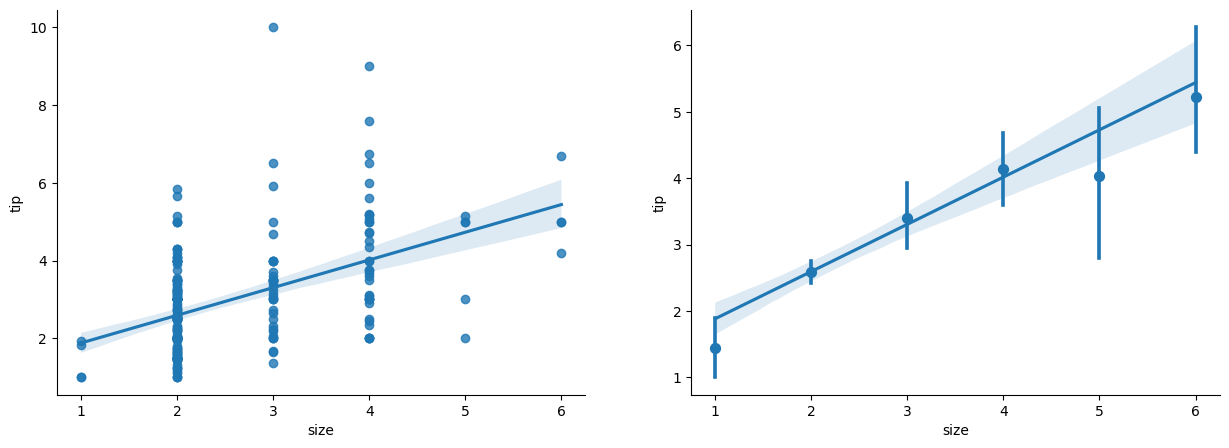

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.regplot(x="size", y="tip", data=tips, ax=axes[0])
sns.regplot(x="size", y="tip", data=tips, x_estimator=np.mean, ax=axes[1])

sns.despine()